# 1. Data & Library Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing as fch

X = fch(as_frame=True)['data']
y = fch(as_frame=True)['target']
data = pd.concat([X, y], axis=1)

display(X)
display(y)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

# 2. Data Preprocessing
1. 결측치 확인
2. Feature Selection

In [3]:
# 1. Null values check
data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
# 필요없는 column 제거하기
# 모든 column 사용!

# 3. EDA
 - feature distribution
 - target distribution

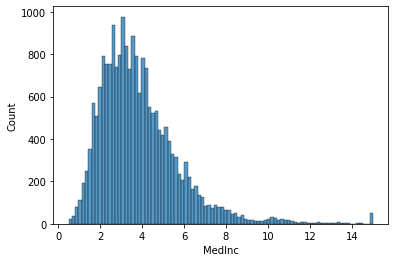

In [6]:
# feature distribution
sns.histplot(data=data, x='MedInc') # clipping 때문에 끝값이 튀는 경우가 있음


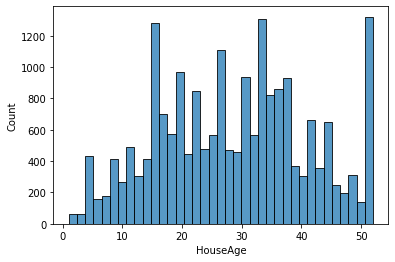

In [7]:
sns.histplot(data=data, x='HouseAge') # clipping 때문에 끝값이 튀는 경우가 있음
# 엉성한 gaussian distribution

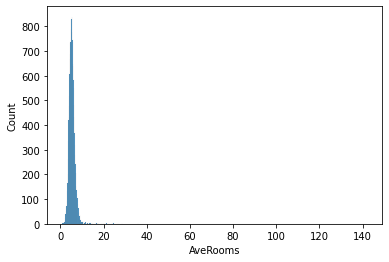

In [8]:
sns.histplot(data=data, x='AveRooms') # 이상치 많음

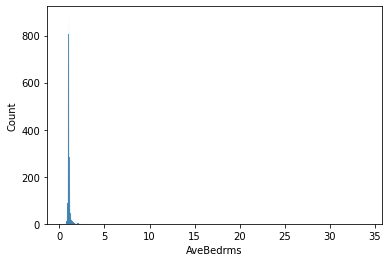

In [9]:
sns.histplot(data=data, x='AveBedrms')

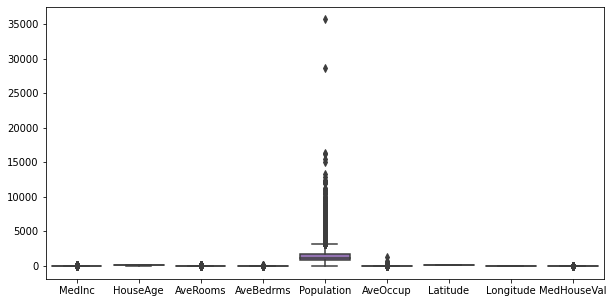

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data)

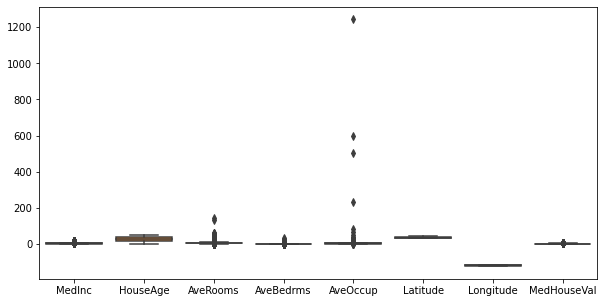

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data.drop(['Population'], axis=1))

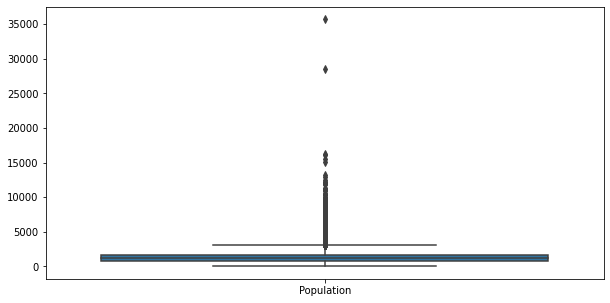

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data.loc[:, ['Population']])

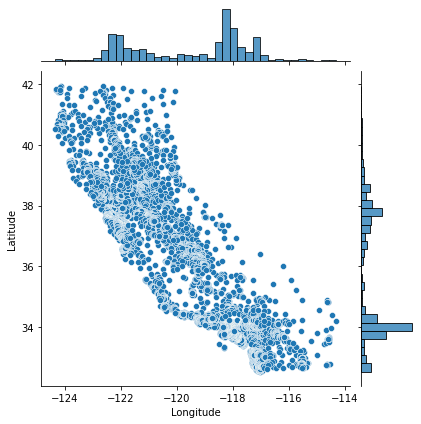

In [30]:
sns.jointplot(data=data, x='Longitude', y='Latitude')

### Find Outlier
1. AveOccup > 200
2. AveRooms > 80
3. AveBedrms > 20
4. Population > 18000

### Remove Outliers

In [28]:
data = data.drop(index=data[data.AveOccup > 200].index.values)
data = data.drop(index=data[data.AveRooms > 80].index.values)
data = data.drop(index=data[data.Population > 18000].index.values)
data = data.drop(index=data[data.AveBedrms > 20].index.values)

In [29]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


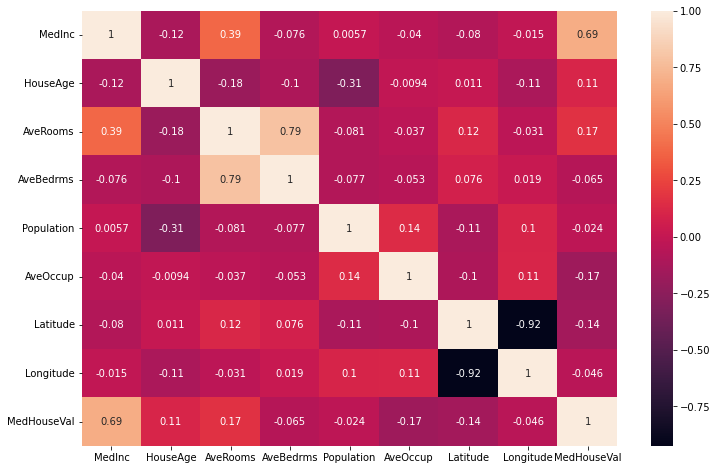

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True)

## Multicollinearity
High(> 0.7) : (AveBedrms, AveRooms), (Longitude, Latitude) 

So, drop the columns(AveBedrms, Longitude)

In [36]:
data = data.drop(columns=["AveBedrms", "Longitude"])
data

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,0.847


# 4. Training
1. train-test split
2. Normalization
3. Model Training
4. Hyper-parameter tuning
5. Evaluation

In [37]:
# 1. Train-Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)


(12384, 8) (4128, 8) (4128, 8) (12384,) (4128,) (4128,)


In [38]:
# 2. Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# y_train = scaler.fit_transform(y_train)
# y_val = scaler.transform(y_val)
# y_test = scaler.transform(y_test)

In [39]:
# 3. Model Training
from sklearn.linear_model import LinearRegression   # Linear Regression
from sklearn.linear_model import Lasso              # Lasso
from sklearn.linear_model import Ridge              # Ridge
from xgboost.sklearn import XGBRegressor            # XGBoost
from lightgbm.sklearn import LGBMRegressor          # LightGBM

# 5. Evaluation Metric
from sklearn.metrics import mean_squared_error      # metric : MSE

In [44]:
reg = LinearRegression()
print(str(reg)[:-2])

LinearRegression


In [71]:
from tables.tests.common import print_heavy
# 3. Training
def training(reg, X_train, X_val, y_train, y_val):
    name = str(reg).split('(')[0]
    reg.fit(X_train, y_train)

    pred_train = reg.predict(X_train)
    pred_val = reg.predict(X_val)

    mse_train = mean_squared_error(y_train, pred_train)
    mse_val = mean_squared_error(y_val, pred_val)

    print(f"--------------- {name} ---------------")
    print("MSE in training: %.4f" % mse_train)
    print("MSE in validation: %.4f" % mse_val)
    print()

In [50]:
reglist = [LinearRegression(), Lasso(), Ridge(), XGBRegressor(), LGBMRegressor()]

for reg in reglist:
    training(reg, X_train, X_val, y_train, y_val)

--------------- LinearRegression ---------------
MSE in training: 0.5144
MSE in validation: 0.5297

--------------- Lasso ---------------
MSE in training: 0.9499
MSE in validation: 0.9792

--------------- Ridge ---------------
MSE in training: 0.5144
MSE in validation: 0.5297

[08:08:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
--------------- XGBRegressor ---------------
MSE in training: 0.2596
MSE in validation: 0.2885

--------------- LGBMRegressor ---------------
MSE in training: 0.1458
MSE in validation: 0.2240



In [68]:
# 4. Hyper-parameter tuning
# GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth" : [8, 10, 12, -1], # 3
    "learning_rate" : [.1, .08], # 2
    "n_estimators" : [110, 120, 130] # 3
} # 3x2x2 = 12

reg5 = LGBMRegressor()

gcv = GridSearchCV(reglist[4], param_grid, scoring='neg_mean_squared_error', verbose=2)
gcv.fit(X_train, y_train)
print(gcv.cv_results_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=110; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=110; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=110; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=110; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=110; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=120; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=120; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=120; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=120; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=120; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=130; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=8, n_e

In [69]:
print(gcv.best_params_)

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 130}


In [70]:
reglist[4] = LGBMRegressor(learning_rate=0.1,
                           max_depth=10,
                           n_estimators=130)

training(reglist[4], X_train, X_test, y_train, y_test)

--------------- LGBMRegressor(max_depth=10, n_estimators=13 ---------------
MSE in training: 0.1332
MSE in validation: 0.2126

